In [119]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_rows',500)
#pd.set_option('display.max_columns',1000)

# Data Understanding

In [120]:
data_path = ('../data/raw/COVID-19_New/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
#raw_data = pd.read_csv(url)
raw_data = pd.read_csv(data_path)

In [121]:
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183572,183687,183908,184038,184224,184360,184473,184587,184819,185086
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,296305,296732,298578,300058,301394,302767,303925,304890,305123,306789
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266445,266487,266542,266591,266654,266700,266772,266839,266916,267010
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,45061,45061,45061,45326,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,102209,102209,102209,102209,102301,102301,102301,102301,102301


In [122]:
time_idx = raw_data.columns[4:]

In [123]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [124]:
raw_data['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [125]:
raw_data[raw_data['Country/Region']=='US'].iloc[:,4::].sum(axis=0)

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
7/22/22    90367064
7/23/22    90390185
7/24/22    90410386
7/25/22    90567290
7/26/22    90733888
Length: 917, dtype: int64

In [126]:
country_list = ['Germany','India','US','China','Spain','Italy']

In [127]:
for each in country_list:
    df_plot[each] = np.array(raw_data[raw_data['Country/Region']==each].iloc[:,4::].sum(axis=0))

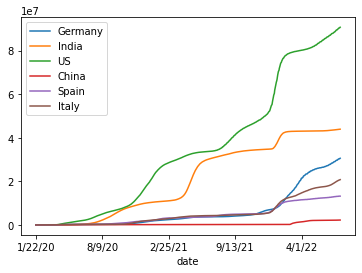

In [128]:
df_plot.set_index('date').plot()

# Data Type Date

In [129]:
df_plot.head()

,date,Germany,India,US,China,Spain,Italy
0,1/22/20,0,0,1,548,0,0
1,1/23/20,0,0,1,643,0,0
2,1/24/20,0,0,2,920,0,0
3,1/25/20,0,0,2,1406,0,0
4,1/26/20,0,0,5,2075,0,0


In [130]:
from datetime import datetime

In [131]:
df_plot.date[0]

'1/22/20'

In [132]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [133]:
# convert to datetime
time_idx = [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] 

# convert date to ISO norm (str)
time_str = [each.strftime('%Y-%m-%d') for each in time_idx]

In [134]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [135]:
df_plot.head()

,date,Germany,India,US,China,Spain,Italy
0,2020-01-22,0,0,1,548,0,0
1,2020-01-23,0,0,1,643,0,0
2,2020-01-24,0,0,2,920,0,0
3,2020-01-25,0,0,2,1406,0,0
4,2020-01-26,0,0,5,2075,0,0


In [136]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

# Relation data model - defining a primary key

We have to use a primary key and each row should have a primary key
It cannot contain null values

In [137]:
data_path = ('../data/raw/COVID-19_New/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_data = pd.read_csv(data_path)
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183572,183687,183908,184038,184224,184360,184473,184587,184819,185086
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,296305,296732,298578,300058,301394,302767,303925,304890,305123,306789
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266445,266487,266542,266591,266654,266700,266772,266839,266916,267010
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,45061,45061,45061,45326,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,102209,102209,102209,102209,102301,102301,102301,102301,102301


In [138]:
raw_data_base = raw_data.rename(columns = {'Country/Region':'Country',
                                          'Province/State':'State'})
raw_data_base['State']=raw_data_base['State'].fillna('no')

In [139]:
raw_data_base = raw_data_base.drop(['Lat','Long'],axis=1)
raw_data_base.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,183572,183687,183908,184038,184224,184360,184473,184587,184819,185086
1,no,Albania,0,0,0,0,0,0,0,0,...,296305,296732,298578,300058,301394,302767,303925,304890,305123,306789
2,no,Algeria,0,0,0,0,0,0,0,0,...,266445,266487,266542,266591,266654,266700,266772,266839,266916,267010
3,no,Andorra,0,0,0,0,0,0,0,0,...,44671,45061,45061,45061,45326,45326,45326,45326,45326,45326
4,no,Angola,0,0,0,0,0,0,0,0,...,101901,102209,102209,102209,102209,102301,102301,102301,102301,102301


In [140]:
transpose_data = raw_data_base.set_index(['State','Country']).T

In [141]:
transpose_data.columns

MultiIndex([(                          'no',          'Afghanistan'),
            (                          'no',              'Albania'),
            (                          'no',              'Algeria'),
            (                          'no',              'Andorra'),
            (                          'no',               'Angola'),
            (                          'no',           'Antarctica'),
            (                          'no',  'Antigua and Barbuda'),
            (                          'no',            'Argentina'),
            (                          'no',              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                          'no',              'Uruguay'),
            (                          'no',           'Uzbekistan'),
            (                          'no',              'Vanuatu'),
            (                          'no',            'Venezuela'),
    

In [142]:
pd_relational_model = transpose_data.stack(level=[0,1]).reset_index().rename(columns = {'level_0':'date',
                                                                 0:'Confirmed Cases'})
pd_relational_model

,date,State,Country,Confirmed Cases
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0
...,...,...,...,...
261340,7/26/22,no,West Bank and Gaza,682096.0
261341,7/26/22,no,Winter Olympics 2022,535.0
261342,7/26/22,no,Yemen,11849.0
261343,7/26/22,no,Zambia,329483.0


In [143]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [144]:
pd_relational_model.dtypes

date               datetime64[ns]
State                      object
Country                    object
Confirmed Cases           float64
dtype: object

In [145]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep = ';',index=False)

In [146]:
data_path='../data/processed/COVID_relational_confirmed.csv'
pd_raw=pd.read_csv(data_path,sep=';',parse_dates=[0])
pd_raw=pd_raw.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_raw.head()

,date,State,Country,Confirmed Cases
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,Kosovo,0.0
2,2020-01-22,no,Kuwait,0.0
3,2020-01-22,no,Kyrgyzstan,0.0
4,2020-01-22,no,Laos,0.0


In [147]:
test_data = pd_raw[((pd_raw['Country']=='US')|(pd_raw['Country']=='Germany'))&(pd_raw['date']>'2020-03-20')]

In [148]:
test_data

,date,State,Country,Confirmed Cases
16854,2020-03-21,no,Germany,16662.0
16904,2020-03-21,no,US,26025.0
17139,2020-03-22,no,Germany,18610.0
17203,2020-03-22,no,US,34944.0
17425,2020-03-23,no,Germany,22672.0
...,...,...,...,...
260586,2022-07-24,no,US,90410386.0
260815,2022-07-25,no,Germany,30476605.0
260864,2022-07-25,no,US,90567290.0
261099,2022-07-26,no,Germany,30598385.0


In [150]:
test_data.groupby(['Country']).agg(np.max)

,date,State,Confirmed Cases
Country,,,
Germany,2022-07-26,no,30598385.0
US,2022-07-26,no,90733888.0


In [ ]:
# %load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate
        Parameters:
        ----------
        in_array : pandas.series
        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))



In [171]:
test_data.groupby(['State','Country']).apply(get_doubling_time_via_regression)

AssertionError: 

In [172]:
def rolling_reg(df_input,col='Confirmed Cases'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result
    

In [173]:
test_data[['State','Country','Confirmed Cases']].groupby(['State','Country']).apply(rolling_reg,'Confirmed Cases')

State  Country        
no     Germany  16854             NaN
                17139             NaN
                17425        6.427510
                17710        5.190573
                17994        6.129400
                             ...     
       US       260016     562.367482
                260294     951.996385
                260586    4172.901143
                260864    1021.495200
                261161     559.937938
Name: Confirmed Cases, Length: 1716, dtype: float64

In [181]:
pd_DR_result = test_data[['State','Country','Confirmed Cases']].groupby(['State','Country']).apply(rolling_reg,'Confirmed Cases').reset_index()

In [185]:
pd_DR_result=pd_DR_result.rename(columns={'Confirmed Cases':'Confirmed_DR',
                             'level_2':'index'})
pd_DR_result.head()

,State,Country,index,Confirmed_DR
0,no,Germany,16854,NaN
1,no,Germany,17139,NaN
2,no,Germany,17425,6.427510
3,no,Germany,17710,5.190573
4,no,Germany,17994,6.129400


In [186]:
pd_raw=pd_raw.reset_index()
pd_raw.head()

,level_0,index,date,State,Country,Confirmed Cases
0,0,0,2020-01-22,Alberta,Canada,0.0
1,1,1,2020-01-22,no,Kosovo,0.0
2,2,2,2020-01-22,no,Kuwait,0.0
3,3,3,2020-01-22,no,Kyrgyzstan,0.0
4,4,4,2020-01-22,no,Laos,0.0


In [189]:
pd_result_large=pd.merge(pd_raw,pd_DR_result[['index','Confirmed_DR']],on=['index'],how='left')
pd_result_large.head()

,level_0,index,date,State,Country,Confirmed Cases,Confirmed_DR
0,0,0,2020-01-22,Alberta,Canada,0.0,NaN
1,1,1,2020-01-22,no,Kosovo,0.0,NaN
2,2,2,2020-01-22,no,Kuwait,0.0,NaN
3,3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN
4,4,4,2020-01-22,no,Laos,0.0,NaN


# Filtering the data with groupby apply

In [195]:

from scipy import signal

def savgol_filter(df_input,column='Confirmed Cases',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result
        

In [196]:
pd_filtered_result=test_data[['State','Country','Confirmed Cases']].groupby(['State','Country']).apply(savgol_filter).reset_index()

In [198]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_result[['index','Confirmed Cases_filtered']],on=['index'],how='left')
pd_result_large.head()

,level_0,index,date,State,Country,Confirmed Cases,Confirmed_DR,Confirmed Cases_filtered_x,Confirmed Cases_filtered_y
0,0,0,2020-01-22,Alberta,Canada,0.0,NaN,NaN,NaN
1,1,1,2020-01-22,no,Kosovo,0.0,NaN,NaN,NaN
2,2,2,2020-01-22,no,Kuwait,0.0,NaN,NaN,NaN
3,3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN,NaN,NaN
4,4,4,2020-01-22,no,Laos,0.0,NaN,NaN,NaN


# Filtered doubling rate

In [201]:
pd_filtered_doubling=pd_result_large[['State','Country','Confirmed Cases_filtered_x']].groupby(['State','Country']).apply(rolling_reg,'Confirmed Cases_filtered_x').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'Confirmed Cases_filtered_x':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.tail()

,State,Country,index,confirmed_filtered_DR
261340,no,Zimbabwe,260011,NaN
261341,no,Zimbabwe,260253,NaN
261342,no,Zimbabwe,260581,NaN
261343,no,Zimbabwe,260823,NaN
261344,no,Zimbabwe,261344,NaN


In [202]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_large.tail()

,level_0,index,date,State,Country,Confirmed Cases,Confirmed_DR,Confirmed Cases_filtered_x,Confirmed Cases_filtered_y,confirmed_filtered_DR
261340,261340,261340,2022-07-26,no,Andorra,45326.0,NaN,NaN,NaN,NaN
261341,261341,261341,2022-07-26,no,Algeria,267010.0,NaN,NaN,NaN,NaN
261342,261342,261342,2022-07-26,no,Albania,306789.0,NaN,NaN,NaN,NaN
261343,261343,261343,2022-07-26,no,Argentina,9507562.0,NaN,NaN,NaN,NaN
261344,261344,261344,2022-07-26,no,Zimbabwe,256284.0,NaN,NaN,NaN,NaN


In [204]:
mask=pd_result_large['Confirmed Cases']>100
pd_result_large['confirmed_filtered_DR']=pd_result_large['confirmed_filtered_DR'].where(mask, other=np.NaN) 

In [205]:
pd_result_large[pd_result_large['Country']=='Germany'].tail()

,level_0,index,date,State,Country,Confirmed Cases,Confirmed_DR,Confirmed Cases_filtered_x,Confirmed Cases_filtered_y,confirmed_filtered_DR
259960,259960,259960,2022-07-22,no,Germany,30331131.0,3.025988e+02,30272764.4,30272764.4,371.001523
260245,260245,260245,2022-07-23,no,Germany,30331133.0,6.586269e+02,30341824.8,30341824.8,444.049693
260530,260530,260530,2022-07-24,no,Germany,30331133.0,3.033113e+07,30413677.4,30413677.4,430.659422
260815,260815,260815,2022-07-25,no,Germany,30476605.0,4.176697e+02,30481675.4,30481675.4,434.926880
261099,261099,261099,2022-07-26,no,Germany,30598385.0,2.280148e+02,30549673.4,30549673.4,448.273117


In [206]:
pd_result_large.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)